In [1]:
import cv2
import os
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras import backend as K
import matplotlib.pyplot as plt
from keras.layers import concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Input,BatchNormalization,LeakyReLU

(224, 224, 3)

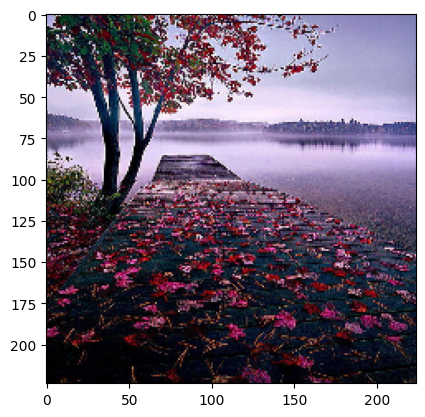

In [3]:
ImagePath="Downloads"
img=cv2.imread(r"Downloads\nature.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(224,224))
plt.imshow(img)
img.shape

In [4]:
HEIGHT=224
WIDTH=224
ImagePath="Downloads"

def ExtractInput(path):
    X_img=[]
    y_img=[]
    for imageDir in os.listdir(ImagePath):
        try:
            img = cv2.imread(ImagePath + imageDir)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
            img = img.astype(np.float32)
            img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
    
            img_lab_rs = cv2.resize(img_lab, (WIDTH, HEIGHT)) 
            img_l = img_lab_rs[:,:,0] 
            
            img_ab = img_lab_rs[:,:,1:]
            img_ab = img_ab/128
            
            X_img.append(img_l)
            y_img.append(img_ab)
        except:
            pass
    X_img = np.array(X_img)
    y_img = np.array(y_img)
    
    return X_img,y_img

In [5]:
X_,y_ = ExtractInput(ImagePath) # Data-preprocessing

In [6]:
K.clear_session()
def InstantiateModel(in_):
    model_ = Conv2D(16,(3,3),padding='same',strides=1)(in_)
    model_ = LeakyReLU()(model_)
   
    model_ = Conv2D(32,(3,3),padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
    model_ = BatchNormalization()(model_)
    model_ = MaxPooling2D(pool_size=(2,2),padding='same')(model_)
    
    model_ = Conv2D(64,(3,3),padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
    model_ = BatchNormalization()(model_)
    model_ = MaxPooling2D(pool_size=(2,2),padding='same')(model_)
    
    model_ = Conv2D(128,(3,3),padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
    model_ = BatchNormalization()(model_)
    
    model_ = Conv2D(256,(3,3),padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
    model_ = BatchNormalization()(model_)
    
    model_ = UpSampling2D((2, 2))(model_)
    model_ = Conv2D(128,(3,3),padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
    model_ = BatchNormalization()(model_)
    
    model_ = UpSampling2D((2, 2))(model_)
    model_ = Conv2D(64,(3,3), padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
   
    
    concat_ = concatenate([model_, in_]) 
    
    model_ = Conv2D(64,(3,3), padding='same',strides=1)(concat_)
    model_ = LeakyReLU()(model_)
    model_ = BatchNormalization()(model_)
    
    model_ = Conv2D(32,(3,3),padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
 
    
    model_ = Conv2D(2,(3,3), activation='tanh',padding='same',strides=1)(model_)

    return model_

In [7]:
Input_Sample = Input(shape=(HEIGHT, WIDTH,1))
Output_ = InstantiateModel(Input_Sample)
Model_Colourization = Model(inputs=Input_Sample, outputs=Output_)

In [9]:
LEARNING_RATE = 0.001
Model_Colourization.compile(tf.keras.optimizers.Adam(lr=LEARNING_RATE),
                            loss='mean_squared_error')
Model_Colourization.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 224, 224, 16  0           ['conv2d[0][0]']                 
                                )                                                             

                                )                                                                 
                                                                                                  
 leaky_re_lu_8 (LeakyReLU)      (None, 224, 224, 32  0           ['conv2d_8[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_9 (Conv2D)              (None, 224, 224, 2)  578         ['leaky_re_lu_8[0][0]']          
                                                                                                  
Total params: 820,386
Trainable params: 819,042
Non-trainable params: 1,344
__________________________________________________________________________________________________


C:\anaconda\envs\tensorflow_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
def GenerateInputs(X_,y_):
    num_iterations = 53*2
    num_images = 53*2
    X_ = np.random.rand(num_images,224,224,1)
    y_ = np.random.rand(num_images,224,224,2)
    while True:
        for i in range(num_iterations):
            X_input = X_[i].reshape(1,224,224,1)
            y_input = y_[i].reshape(1,224,224,2)
            yield (X_input,y_input)

Model_Colourization.fit_generator(GenerateInputs(X_,y_),epochs=53,verbose=1,steps_per_epoch=53,shuffle=True)


C:\Users\my pc\AppData\Local\Temp\ipykernel_464\1025065210.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Model_Colourization.fit_generator(GenerateInputs(X_,y_),epochs=53,verbose=1,steps_per_epoch=53,shuffle=True)


Epoch 1/53
53/53 [==============================] - 51s 965ms/step - loss: 0.0869
Epoch 2/53
53/53 [==============================] - 52s 987ms/step - loss: 0.0869
Epoch 3/53
53/53 [==============================] - 58s 1s/step - loss: 0.0878
Epoch 4/53
53/53 [==============================] - 58s 1s/step - loss: 0.0887
Epoch 5/53
53/53 [==============================] - 58s 1s/step - loss: 0.0894
Epoch 6/53
53/53 [==============================] - 51s 967ms/step - loss: 0.0884
Epoch 7/53
53/53 [==============================] - 33s 609ms/step - loss: 0.0877
Epoch 8/53
53/53 [==============================] - 26s 487ms/step - loss: 0.0892
Epoch 9/53
53/53 [==============================] - 25s 478ms/step - loss: 0.0882
Epoch 10/53
53/53 [==============================] - 25s 476ms/step - loss: 0.0865
Epoch 11/53
53/53 [==============================] - 25s 478ms/step - loss: 0.0862
Epoch 12/53
53/53 [==============================] - 26s 485ms/step - loss: 0.0863
Epoch 13/53
53/53 [===

In [47]:
Test_Image_path=r"Downloads/"

In [48]:
import os

def ExtractTestInput(ImagePath):

    if not os.path.exists(ImagePath):
        raise FileNotFoundError(f"The file {ImagePath} does not exist.")

    img = cv2.imread(ImagePath)
    if img is None:
        raise FileNotFoundError(f"The file {ImagePath} does not exist.")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_= cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img_ = cv2.cvtColor(img_, cv2.COLOR_RGB2Lab)
    img_=img_.astype(np.float32)
    img_lab_rs = cv2.resize(img_, (WIDTH, HEIGHT)) 
    img_l = img_lab_rs[:,:,0] 
    img_l_reshaped = img_l.reshape(1,224,224,1)
    
    return img_l_reshaped

In [51]:
ImagePath=Test_Image_path+"nature_3.jpg"
image_for_test = ExtractTestInput(ImagePath)
Prediction = Model_Colourization.predict(image_for_test)
Prediction = Prediction*128
Prediction=Prediction.reshape(224,224,2)

1/1 [==============================] - 0s 150ms/step


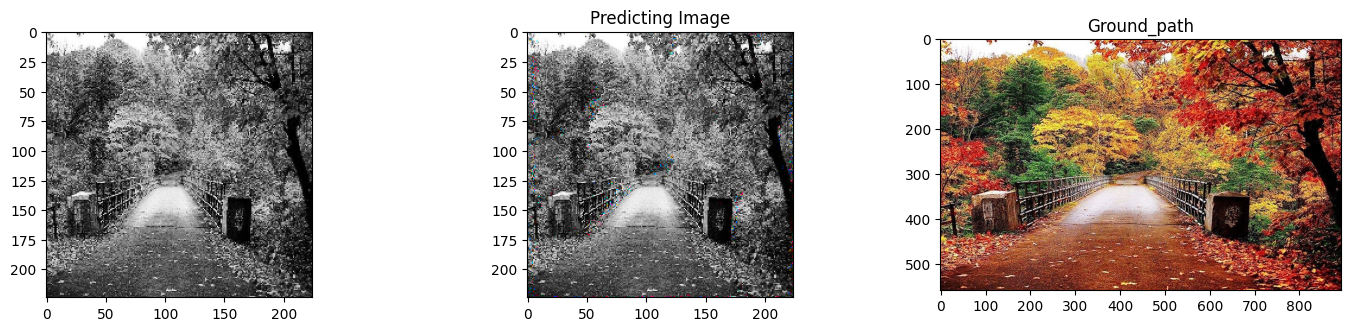

In [52]:
plt.figure(figsize=(30,20))
plt.subplot(5,5,1)
img=cv2.imread(Test_Image_path+"nature_3.jpg")
img_1=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(img_1,cv2.COLOR_RGB2GRAY)
img=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
img=cv2.resize(img,(224,224))
plt.imshow(img)

plt.subplot(5,5,1+1)
img_=cv2.cvtColor(img,cv2.COLOR_RGB2Lab)
img_[:,:,1:]=Prediction
img_=cv2.cvtColor(img_,cv2.COLOR_Lab2RGB)
plt.title("Predicting Image")
plt.imshow(img_)

plt.subplot(5,5,1+2)
plt.title("Ground_path")
plt.imshow(img_1)

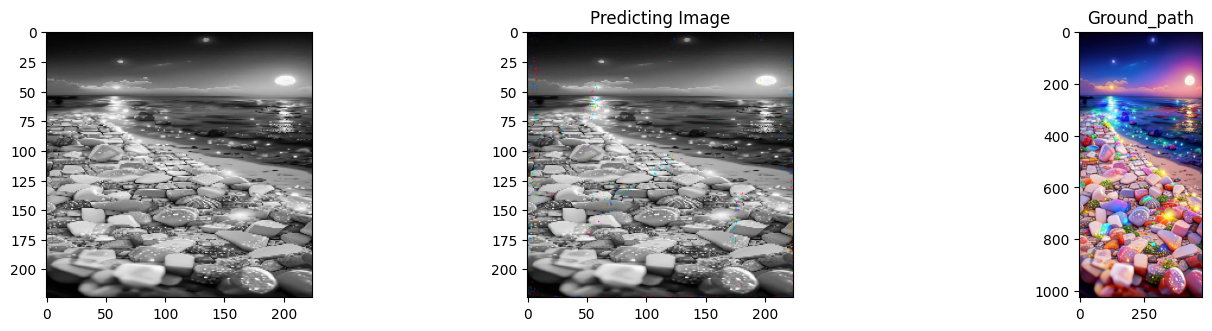

In [55]:
plt.figure(figsize=(30,20))
plt.subplot(5,5,1)
img=cv2.imread(Test_Image_path+"nature_4.jpg")
img_1=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(img_1,cv2.COLOR_RGB2GRAY)
img=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
img=cv2.resize(img,(224,224))
plt.imshow(img)

plt.subplot(5,5,1+1)
img_=cv2.cvtColor(img,cv2.COLOR_RGB2Lab)
img_[:,:,1:]=Prediction
img_=cv2.cvtColor(img_,cv2.COLOR_Lab2RGB)
plt.title("Predicting Image")
plt.imshow(img_)

plt.subplot(5,5,1+2)
plt.title("Ground_path")
plt.imshow(img_1)

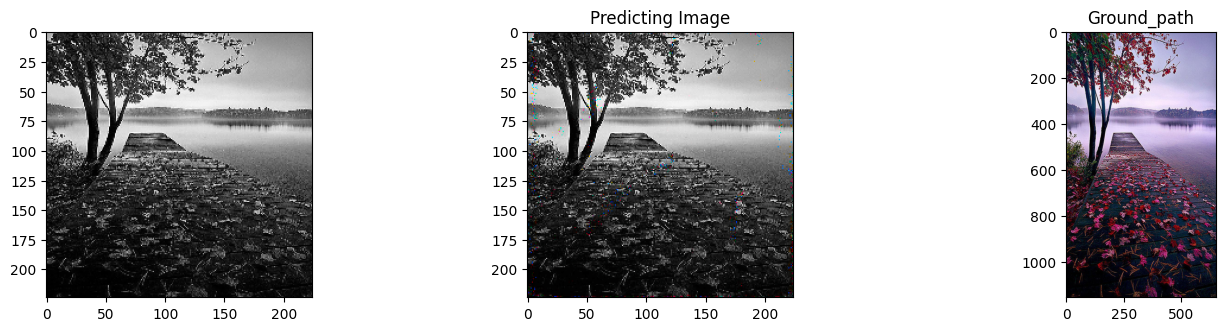

In [56]:
plt.figure(figsize=(30,20))
plt.subplot(5,5,1)
img=cv2.imread(Test_Image_path+"nature.jpg")
img_1=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(img_1,cv2.COLOR_RGB2GRAY)
img=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
img=cv2.resize(img,(224,224))
plt.imshow(img)

plt.subplot(5,5,1+1)
img_=cv2.cvtColor(img,cv2.COLOR_RGB2Lab)
img_[:,:,1:]=Prediction
img_=cv2.cvtColor(img_,cv2.COLOR_Lab2RGB)
plt.title("Predicting Image")
plt.imshow(img_)

plt.subplot(5,5,1+2)
plt.title("Ground_path")
plt.imshow(img_1)